In [1]:
%matplotlib
%matplotlib widget
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.ion()

Using matplotlib backend: <object object at 0x000001F4A6E5BB90>


In [2]:
MIN_POSITION = 0.9
POTENTIAL_LENGTH = 1
QUADRATIC_COEFFICIENT = 20
MAX_VALUE_V = 40

    
X = np.linspace(0, 2*POTENTIAL_LENGTH, 40)
Y = np.linspace(-POTENTIAL_LENGTH, POTENTIAL_LENGTH, 40)

X, Y = np.meshgrid(X, Y)

In [3]:
def ratchet_potential(x, y, A, B, L, M, offset):
    """Ratchet Potential

    Parameters
    ----------
    x : float
        Current x position.
    y : float
        Current y position
    A : float
        Potential minimum's position. Must be `A<L`
    B : float
        Confinement potential quadratic coefficient.
    L : float
        Potential length.
    M : float
        Potential's maximum value.
    offset : float
        `x` coordinate offset.

    Returns
    -------
    float
        Ratchet potential.
    """
    _x = (x + offset)%L
    return (_x<A) * -(_x-A)*M/A + (_x>=A) * (_x-A)*M/(L-A) + B*y**2
    

Text(0.5, 0, 'Potential')

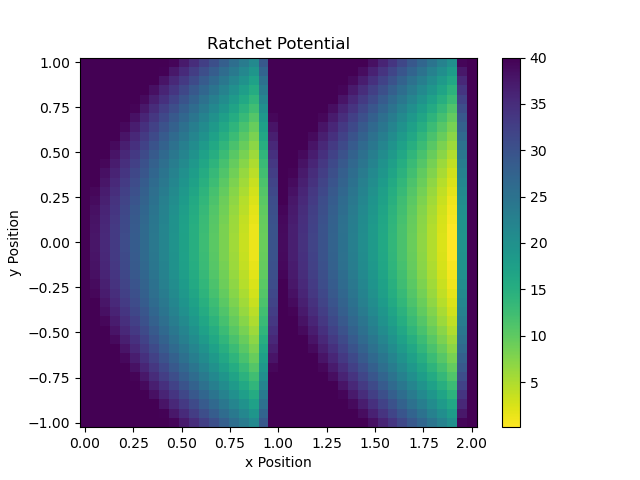

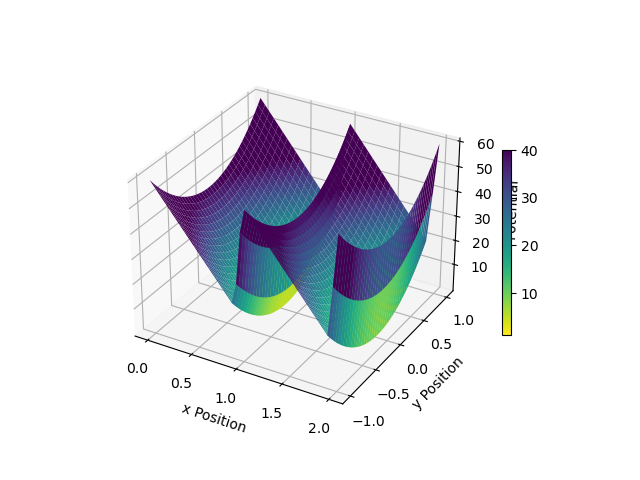

In [4]:
mesh = ratchet_potential(X, Y, MIN_POSITION, QUADRATIC_COEFFICIENT, POTENTIAL_LENGTH, MAX_VALUE_V, offset=0)

fig, ax  = plt.subplots()
c = ax.pcolormesh(X, Y, mesh, vmax=MAX_VALUE_V, cmap='viridis_r')
plt.colorbar(c)
ax.set_xlabel("x Position")
ax.set_ylabel("y Position")
ax.set_title("Ratchet Potential")


fig3d, ax3d  = plt.subplots(subplot_kw={'projection': '3d'})
c3d = ax3d.plot_surface(X, Y, mesh, vmax=MAX_VALUE_V, cmap='viridis_r')
plt.colorbar(c3d, shrink=0.5)
ax3d.set_xlabel("x Position")
ax3d.set_ylabel("y Position")
ax3d.set_zlabel("Potential")
# ax3d.set_title("Ratchet Potential")